In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
cd ../TileEM/

[Errno 2] No such file or directory: '../TileEM/'
/home/jlee782/crowd-seg


In [3]:
from TileEM_plot_toolbox import *
from qualityBaseline import *
from glob import glob

In [38]:
worker_Nbatches={5:10,10:8,15:6,20:4}#,25:2,30:1}
sampleN_lst=worker_Nbatches.keys()

In [168]:
cd ..

/home/jlee782/crowd-seg/analysis/TileEM


In [171]:
from collections import OrderedDict
df = pd.read_csv("../computed_my_COCO_BBvals.csv",index_col=0)

In [201]:
cd ../../

/home/jlee782/crowd-seg/analysis/TileEM


In [202]:
for Nworker in sampleN_lst:
    for batch_num in range(worker_Nbatches[Nworker]):
        dir_name = "{0}worker_rand{1}".format(Nworker,batch_num)
        #print dir_name
        os.chdir("sample/"+dir_name)
         
        # Creating 2 empty precision recall table containing P,R for each metric used 
        cols = [u'Num Points',u'Area Ratio',u'Jaccard [Self]', u'Precision [Self]', u'Recall [Self]']

        PR_tbl = pd.DataFrame(index=object_lst)#,columns=cols)
        PR_tbl["object_id"]=object_lst
        # Summarization-Based Method
        df.ix[df["Precision [Self]"]>1,"Precision [Self]"]=1
        df.ix[df["Recall [Self]"]>1,"Recall [Self]"]=1
        df = df[~(df["worker_id"].isin([1,2,3]))] #Filter our ground truth workers
        for attr in cols:
            tbl=[]
            for objid in object_lst:
                workers=pkl.load(open("worker{}.pkl".format(objid)))
                filtered_df = df[(df["worker_id"].isin(workers))&(df["object_id"]==objid)] #only look at summarization scores of sampled workers
                best_worker_BB = filtered_df[filtered_df[attr]==filtered_df[attr].max()]
                tbl.append([objid,best_worker_BB["Precision [Self]"].values[0],best_worker_BB["Recall [Self]"].values[0]])
            tmp_PR_tbl = pd.DataFrame(tbl,columns=["object_id","Precision","Recall"])
            PR_tbl["P [{}]".format(attr)]=tmp_PR_tbl["Precision"]
            PR_tbl["R [{}]".format(attr)]=tmp_PR_tbl["Recall"]
        # Vision based methods 
        for threshold in [10,50,90]:
            visionPR = pd.read_csv("../../../PR{}.csv".format(threshold))
            PR_tbl["P [Vision{}%]".format(threshold)] = visionPR["precision"]
            PR_tbl["R [Vision{}%]".format(threshold)] = visionPR["recall"]
        #MVT, Tile
        tbl=[]
        for fname in glob("Tstar_idx_obj*.pkl"):
            objid=int(fname.split("_")[-1].split(".")[0][3:])
            tiles = pkl.load(open("vtiles{}.pkl".format(objid)))
            #Tile EM
            Tstar_lst = pkl.load(open("Tstar_idx_obj{}.pkl".format(objid)))
            TileEMP,TileEMR=compute_PR(objid,np.array(Tstar_lst[-1]),tiles)
            # Majority Vote 
            PMVT,RMVT = majority_vote(objid,heuristic="50%")
            PMVTtopk,RMVTtopk = majority_vote(objid,heuristic="topk")
            PMVTtopP,RMVTtopP = majority_vote(objid,heuristic="topPercentile")
            tbl.append([objid,TileEMP,TileEMR,PMVT,RMVT,PMVTtopk,RMVTtopk,PMVTtopP,RMVTtopP])
        Tile_df = pd.DataFrame(tbl,columns=["object_id","P [TileEM]","R [TileEM]","P [MVT]","R [MVT]","P [MVTtop10]","R [MVTtop10]","P [MVTtop95%]","R [MVTtop95%]"])
        PR_tbl_all = PR_tbl.merge(Tile_df,on="object_id")
        #Save to file in that folder 
        PR_tbl_all.to_csv("PR_tbl_all.csv")
        os.chdir("../..")

TopologyException: side location conflict at 447 175
TopologyException: side location conflict at 461 219
TopologyException: found non-noded intersection between LINESTRING (398.6 163.8, 398.087 159.696) and LINESTRING (398.087 159.696, 398.812 171.055) at 398.08695652173913 159.69565217391317
TopologyException: found non-noded intersection between LINESTRING (373 126, 372.353 127.294) and LINESTRING (372.353 127.294, 376.667 126) at 372.35294117647061 127.29411764705883
Self-intersection at or near point 372.35294117647061 127.29411764705884
TopologyException: found non-noded intersection between LINESTRING (398.6 163.8, 398.087 159.696) and LINESTRING (398.087 159.696, 398.812 171.055) at 398.08695652173913 159.69565217391317
TopologyException: found non-noded intersection between LINESTRING (169.863 171.003, 170.721 171.465) and LINESTRING (175 172, 170.721 171.465) at 170.72093023255812 171.46511627906975
TopologyException: found non-noded intersection between LINESTRING (169.863 1

Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310

TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310

Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.388349

TopologyException: found non-noded intersection between LINESTRING (420.488 179.349, 421 186) and LINESTRING (423 185, 420.488 179.349) at 420.48837209302326 179.34883720930225
TopologyException: found non-noded intersection between LINESTRING (416 190, 420.735 186.618) and LINESTRING (416.515 196.465, 420.735 186.618) at 420.73529411764707 186.61764705882356
Self-intersection at or near point 420.44184064296576 178.74392835855451
TopologyException: found non-noded intersection between LINESTRING (416 190, 420.735 186.618) and LINESTRING (416.515 196.465, 420.735 186.618) at 420.73529411764707 186.61764705882356
Self-intersection at or near point 420.44184064296576 178.74392835855451
TopologyException: found non-noded intersection between LINESTRING (416 190, 420.735 186.618) and LINESTRING (416.515 196.465, 420.735 186.618) at 420.73529411764707 186.61764705882356
Self-intersection at or near point 420.44184064296576 178.74392835855451
TopologyException: found non-noded intersection b

TopologyException: found non-noded intersection between LINESTRING (383.25 477.57, 417.189 477.013) and LINESTRING (390.612 477.449, 380.012 477.623) at 383.52174043587462 477.56521736990368
TopologyException: found non-noded intersection between LINESTRING (392.229 375.857, 388.963 374.138) and LINESTRING (392.229 375.857, 385.714 372.429) at 388.98697916666703 374.15104166666686
TopologyException: found non-noded intersection between LINESTRING (355.154 472.692, 354.621 471.448) and LINESTRING (355.154 472.692, 355.154 472.692) at 355.15384615384596 472.69230769230711
TopologyException: found non-noded intersection between LINESTRING (124.273 145.727, 122.161 146.548) and LINESTRING (124 146, 123.571 146) at 123.5714285714286 146
TopologyException: no outgoing dirEdge found at 138.02702702702703 140.37837837837839
TopologyException: found non-noded intersection between LINESTRING (123.571 146, 124.333 145.704) and LINESTRING (124.333 145.704, 124.273 145.727) at 124.29879732943118 14

TopologyException: found non-noded intersection between LINESTRING (251.235 515.207, 269 511) and LINESTRING (350 436, 251.235 515.207) at 251.2351313969572 515.207468879668
Self-intersection at or near point 251.23513139695709 515.207468879668
TopologyException: found non-noded intersection between LINESTRING (249 517, 251.235 515.207) and LINESTRING (251.235 515.207, 242.4 517.3) at 251.23513139695703 515.207468879668
TopologyException: found non-noded intersection between LINESTRING (636.077 254.535, 637 245) and LINESTRING (636.046 254.593, 637.272 252.338) at 636.07721518987341 254.53544303797463
Self-intersection at or near point 628.62500000000011 407.37499999999994
TopologyException: found non-noded intersection between LINESTRING (631.8 404.2, 628.625 407.375) and LINESTRING (630 405, 628.625 407.375) at 628.62500000000011 407.37499999999994
Self-intersection at or near point 628.62500000000011 407.37499999999994
TopologyException: found non-noded intersection between LINESTRI

TopologyException: found non-noded intersection between LINESTRING (357 85, 360.4 78.2) and LINESTRING (368 63, 360.4 78.2) at 360.40000000000003 78.199999999999918
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: found non-noded intersection between LINESTRING (366.298 54.4894, 367.407 55.6914) and LINESTRING (367.407 55.6914, 366.298 54.4894) at 366.44396112424482 54.647624551265189
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: found non-noded intersection between LINESTRING (357 85, 360.4 78.2) and LINESTRING (368 63, 360.4 78.2) at 360.40000000000003 78.199999999999918
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: found non-noded intersection between LINESTRING (357 85, 360.4 78.2) and LINESTRING (368 63, 360.4 78.2) at 360.40000000000003 78.199999999999918
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: f

TopologyException: side location conflict at 63 389
TopologyException: found non-noded intersection between LINESTRING (136.645 380.476, 132.672 381.872) and LINESTRING (136 380, 132.672 381.872) at 132.67200000000003 381.87200000000001
TopologyException: found non-noded intersection between LINESTRING (31.2143 265.429, 30 297) and LINESTRING (30.9225 273.016, 30.7672 274.549) at 30.922480620155039 273.01550387596899
TopologyException: found non-noded intersection between LINESTRING (127.847 190.727, 127.879 190.867) and LINESTRING (127.885 190.893, 127.835 190.672) at 127.87080709042064 190.83155119785081
TopologyException: side location conflict at 30.33430232558139 362.0988372093023
TopologyException: found non-noded intersection between LINESTRING (106.057 128.629, 108.571 128.786) and LINESTRING (108.571 128.786, 107.327 128.164) at 108.57142857142858 128.78571428571431
TopologyException: found non-noded intersection between LINESTRING (71.7021 151.043, 71.8 153) and LINESTRING (7

TopologyException: found non-noded intersection between LINESTRING (268.464 502.179, 267.101 497.544) and LINESTRING (268.464 502.179, 266.861 497.726) at 268.46428571371609 502.17857142698932
TopologyException: found non-noded intersection between LINESTRING (22 336, 14.1429 347) and LINESTRING (27 327, 14.1429 347) at 14.142857142857363 346.99999999999966
TopologyException: side location conflict at 100 107
TopologyException: found non-noded intersection between LINESTRING (348.108 273.162, 348.108 273.162) and LINESTRING (348.108 273.162, 349 269) at 348.10810810810813 273.16216216216213
TopologyException: found non-noded intersection between LINESTRING (186.632 75.7368, 158.412 78.5588) and LINESTRING (158.412 78.5588, 187.073 75.6927) at 184.24680899791818 75.975319100208196
TopologyException: found non-noded intersection between LINESTRING (22 336, 14.1429 347) and LINESTRING (14.1429 347, 27 327) at 14.142857142857363 346.99999999999966
TopologyException: found non-noded interse

TopologyException: found non-noded intersection between LINESTRING (1.06041 362.158, 1.01177 378.94) and LINESTRING (1.01177 378.94, 0.00581594 379) at 1.0117667121418825 378.94048431105045
TopologyException: found non-noded intersection between LINESTRING (166.1 199.611, 170.95 199.687) and LINESTRING (130.77 199.059, 178.861 199.81) at 167.0810925128053 199.62626707051257
TopologyException: side location conflict at 171.5 160
TopologyException: found non-noded intersection between LINESTRING (177 473.714, 175 472) and LINESTRING (167 468, 177 473.714) at 176.99999999999991 473.71428571428567
TopologyException: found non-noded intersection between LINESTRING (177 473.714, 175 472) and LINESTRING (167 468, 177 473.714) at 176.99999999999991 473.71428571428567
TopologyException: found non-noded intersection between LINESTRING (153.5 465, 151.973 465.436) and LINESTRING (152.386 465.318, 151.423 465.19) at 152.38636363636363 465.31818181818181
TopologyException: found non-noded intersect

TopologyException: found non-noded intersection between LINESTRING (149.063 321.159, 147.196 316.49) and LINESTRING (147 317, 148.077 318.692) at 148.07692307692309 318.69230769230774
Self-intersection at or near point 148.07692307692309 318.69230769230774
TopologyException: found non-noded intersection between LINESTRING (149.063 321.159, 147.196 316.49) and LINESTRING (147 317, 148.077 318.692) at 148.07692307692309 318.69230769230774
Self-intersection at or near point 148.07692307692309 318.69230769230774
TopologyException: found non-noded intersection between LINESTRING (149.063 321.159, 147.196 316.49) and LINESTRING (147 317, 148.077 318.692) at 148.07692307692309 318.69230769230774
Self-intersection at or near point 148.07692307692309 318.69230769230774
TopologyException: found non-noded intersection between LINESTRING (149.063 321.159, 147.196 316.49) and LINESTRING (147 317, 148.077 318.692) at 148.07692307692309 318.69230769230774
Self-intersection at or near point 148.076923

TopologyException: side location conflict at 295 302
TopologyException: found non-noded intersection between LINESTRING (356.902 325.875, 356.902 325.875) and LINESTRING (356.902 325.875, 356.902 325.875) at 356.90207715133533 325.87537091988133
TopologyException: found non-noded intersection between LINESTRING (356.902 325.875, 356.902 325.875) and LINESTRING (356.902 325.875, 356.902 325.875) at 356.90207715133533 325.87537091988133
TopologyException: found non-noded intersection between LINESTRING (275.086 258.343, 274.571 259.286) and LINESTRING (274.571 259.286, 275.528 257.532) at 274.645069601621 259.15070573036149
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.4

Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection betw

Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection betw

Self-intersection at or near point 398.13824884792626 234.7557603686636
TopologyException: found non-noded intersection between LINESTRING (409.802 227.13, 396.406 235.888) and LINESTRING (398.138 234.756, 413 230) at 398.13824884792626 234.7557603686636
Self-intersection at or near point 398.13824884792626 234.7557603686636
TopologyException: found non-noded intersection between LINESTRING (409.802 227.13, 396.406 235.888) and LINESTRING (398.138 234.756, 413 230) at 398.13824884792626 234.7557603686636
Self-intersection at or near point 398.13824884792626 234.7557603686636
TopologyException: found non-noded intersection between LINESTRING (409.802 227.13, 396.406 235.888) and LINESTRING (398.138 234.756, 413 230) at 398.13824884792626 234.7557603686636
Self-intersection at or near point 398.13824884792626 234.7557603686636
TopologyException: found non-noded intersection between LINESTRING (409.802 227.13, 396.406 235.888) and LINESTRING (398.138 234.756, 413 230) at 398.1382488479262

TopologyException: found non-noded intersection between LINESTRING (229.023 338.281, 229.023 338.281) and LINESTRING (282.869 336.072, 229.023 338.281) at 229.02304147465432 338.28110599078343
TopologyException: found non-noded intersection between LINESTRING (117.688 341.563, 117.688 341.563) and LINESTRING (117.688 341.563, 117.688 341.563) at 117.6875000000001 341.56250000000006
TopologyException: found non-noded intersection between LINESTRING (124.217 174.342, 125.1 173.795) and LINESTRING (123.975 174.492, 124.769 174) at 124.3564650548072 174.25552163273841
TopologyException: found non-noded intersection between LINESTRING (309.882 263.989, 309.202 318.754) and LINESTRING (309.202 318.754, 310.852 313.472) at 309.20181112548511 318.75420439844754
TopologyException: side location conflict at 105.686220642103 262.28740214034332
TopologyException: found non-noded intersection between LINESTRING (105.211 260.704, 105.34 261.132) and LINESTRING (105.327 261.09, 105.261 260.87) at 105

TopologyException: found non-noded intersection between LINESTRING (113.778 357.222, 109.715 344.664) and LINESTRING (113.778 357.222, 117.333 369.667) at 113.77777777777779 357.22222222222229
TopologyException: found non-noded intersection between LINESTRING (107.969 339.2, 107.875 338.977) and LINESTRING (107.875 338.977, 108.888 342.109) at 107.87500000000003 338.97727272727286
TopologyException: no outgoing dirEdge found at 36 172
TopologyException: found non-noded intersection between LINESTRING (1.98746 204.701, 7 267) and LINESTRING (1.98746 204.701, 2.89535 178.07) at 1.9874572405929307 204.7012542759407
TopologyException: found non-noded intersection between LINESTRING (132.382 427.882, 132.388 427.905) and LINESTRING (132.386 427.9, 132.382 427.882) at 132.38488787793315 427.89350666290591
TopologyException: found non-noded intersection between LINESTRING (91.5149 294.713, 91.5149 294.713) and LINESTRING (83 273, 91.5149 294.713) at 91.514851485148498 294.71287128712868
Topol

TopologyException: found non-noded intersection between LINESTRING (131.923 125.364, 144.799 123.276) and LINESTRING (142.358 123.672, 131.923 125.364) at 138.70462043040291 124.2641156058806
TopologyException: side location conflict at 121.39999999999998 75.900000000000006
TopologyException: found non-noded intersection between LINESTRING (59.6364 75.4545, 57.9048 74.4444) and LINESTRING (60.7059 77.0588, 57.9048 74.4444) at 57.904761904761934 74.444444444444471
TopologyException: found non-noded intersection between LINESTRING (103 55, 103.176 56.2687) and LINESTRING (103.176 56.2687, 102.457 55.7547) at 103.17621145374449 56.268722466960348
TopologyException: found non-noded intersection between LINESTRING (28.2867 345.804, 29 359) and LINESTRING (31.2028 364.35, 28.4079 348.046) at 28.407894736842106 348.04605263157896
TopologyException: found non-noded intersection between LINESTRING (28.2867 345.804, 29 359) and LINESTRING (31.2028 364.35, 28.4079 348.046) at 28.407894736842106 3

Self-intersection at or near point 419.84816753926702 296.72251308900519
TopologyException: found non-noded intersection between LINESTRING (421.646 248.828, 421.678 248.771) and LINESTRING (421.111 251.889, 421.678 248.771) at 421.67796610169489 248.77118644067801
TopologyException: found non-noded intersection between LINESTRING (576 383, 571.426 386.327) and LINESTRING (571.426 386.327, 575.711 383.211) at 575.36146728046219 383.46438743239111
TopologyException: found non-noded intersection between LINESTRING (576 383, 571.426 386.327) and LINESTRING (571.426 386.327, 575.711 383.211) at 575.36146728046219 383.46438743239111
TopologyException: found non-noded intersection between LINESTRING (418.291 267.994, 421.164 258.047) and LINESTRING (419.983 262.136, 418.688 272.5) at 419.9830508474576 262.13559322033927
TopologyException: found non-noded intersection between LINESTRING (576 383, 571.426 386.327) and LINESTRING (571.426 386.327, 575.711 383.211) at 575.36146728046219 383.4643

TopologyException: found non-noded intersection between LINESTRING (489.989 301.782, 489.974 302.136) and LINESTRING (489.974 302.136, 489.98 301.984) at 489.97481572119227 302.1170148307898
TopologyException: found non-noded intersection between LINESTRING (463.515 326.708, 485.4 326.1) and LINESTRING (463.515 326.708, 476.226 326.355) at 468.64251070933494 326.56548581362961
TopologyException: found non-noded intersection between LINESTRING (489.989 301.782, 489.989 301.782) and LINESTRING (489.989 301.782, 489.989 301.782) at 489.98850574712645 301.7816091954025
TopologyException: found non-noded intersection between LINESTRING (463.515 326.708, 485.4 326.1) and LINESTRING (463.515 326.708, 476.226 326.355) at 468.64251070933494 326.56548581362961
TopologyException: found non-noded intersection between LINESTRING (293.604 310.584, 293.5 311) and LINESTRING (294.893 302.643, 293.5 311) at 293.50000000000017 310.99999999999932
TopologyException: side location conflict at 362.691358024

TopologyException: found non-noded intersection between LINESTRING (349 154, 356.138 148.414) and LINESTRING (356.138 148.414, 344 156) at 356.13793103448245 148.41379310344843
TopologyException: found non-noded intersection between LINESTRING (502.56 168.8, 500 164) and LINESTRING (497.333 161.333, 502.56 168.8) at 502.55999999999995 168.79999999999993
TopologyException: found non-noded intersection between LINESTRING (489.379 149.032, 490 154) and LINESTRING (489.379 149.032, 491 151) at 489.37894736842105 149.03157894736847
TopologyException: found non-noded intersection between LINESTRING (489.379 149.032, 489.167 147.333) and LINESTRING (478.093 135.327, 489.379 149.032) at 489.37894736842105 149.03157894736844
TopologyException: found non-noded intersection between LINESTRING (500 164, 495.4 159.4) and LINESTRING (490 154, 495.4 159.4) at 495.39999999999992 159.39999999999998
TopologyException: found non-noded intersection between LINESTRING (502.56 168.8, 500 164) and LINESTRING

TopologyException: found non-noded intersection between LINESTRING (187.451 165.478, 178.966 161.621) and LINESTRING (178.966 161.621, 190.197 168.841) at 178.96551724137939 161.62068965517247
Self-intersection at or near point 187.45095124851369 165.47770511296076
TopologyException: side location conflict at 158.66666666666634 171.7777777777778
Self-intersection at or near point 158.66666666666634 171.7777777777778
TopologyException: side location conflict at 158.66666666666634 171.7777777777778
Self-intersection at or near point 158.66666666666634 171.7777777777778
TopologyException: side location conflict at 158.66666666666634 171.7777777777778
Self-intersection at or near point 158.66666666666634 171.7777777777778
TopologyException: side location conflict at 158.66666666666634 171.7777777777778
Self-intersection at or near point 158.66666666666634 171.7777777777778
TopologyException: side location conflict at 158.66666666666634 171.7777777777778
Self-intersection at or near point 1

TopologyException: found non-noded intersection between LINESTRING (391.025 362.723, 391.038 362.722) and LINESTRING (391.025 362.723, 393.4 361.8) at 391.02547637896708 362.72341266985347
TopologyException: Directed Edge visited twice during ring-building at 410.53613053613111 391.61072261072223
TopologyException: found non-noded intersection between LINESTRING (630 394.118, 622.276 382.759) and LINESTRING (622.276 382.759, 624 385) at 622.27586206896626 382.75862068965614
TopologyException: found non-noded intersection between LINESTRING (2.50416 223.13, 2.71002 229.58) and LINESTRING (0 220, 19.7222 289.722) at 2.7100152001351119 229.58047627090019
TopologyException: found non-noded intersection between LINESTRING (19.7222 289.722, 19.7222 289.722) and LINESTRING (19.7222 289.722, 19.7222 289.722) at 19.722222222166465 289.72222222202504
TopologyException: found non-noded intersection between LINESTRING (93.1495 440.712, 93.1495 440.712) and LINESTRING (93.1495 440.712, 98.1756 447.

Self-intersection at or near point 228.92307692307691 124.46153846153848
TopologyException: side location conflict at 228.92307692307691 124.46153846153848
Self-intersection at or near point 228.92307692307691 124.46153846153848
TopologyException: side location conflict at 228.92307692307691 124.46153846153848
Self-intersection at or near point 228.92307692307691 124.46153846153848
TopologyException: side location conflict at 228.92307692307691 124.46153846153848
Self-intersection at or near point 228.92307692307691 124.46153846153848
TopologyException: side location conflict at 228.92307692307691 124.46153846153848
Self-intersection at or near point 228.92307692307691 124.46153846153848
TopologyException: side location conflict at 228.92307692307691 124.46153846153848
Self-intersection at or near point 228.92307692307691 124.46153846153848
TopologyException: found non-noded intersection between LINESTRING (366.843 173.587, 366.333 169) and LINESTRING (366.333 169, 367.098 175.88) at 3

TopologyException: found non-noded intersection between LINESTRING (116.993 390.927, 141 378) and LINESTRING (117.296 390.764, 120.6 389.8) at 117.29615930202219 390.76360652968037
TopologyException: EdgeRing::computePoints: found null Directed Edge
TopologyException: found non-noded intersection between LINESTRING (152.301 311.785, 160.733 343.98) and LINESTRING (154.84 316.44, 152.301 311.785) at 152.30076885161282 311.78475379706703
TopologyException: found non-noded intersection between LINESTRING (116.993 390.927, 141 378) and LINESTRING (117.296 390.764, 120.6 389.8) at 117.29615930202219 390.76360652968037
TopologyException: EdgeRing::computePoints: found null Directed Edge
TopologyException: EdgeRing::computePoints: found null Directed Edge
TopologyException: found non-noded intersection between LINESTRING (271.525 385.966, 254 380) and LINESTRING (258.977 382.955, 271.525 385.966) at 271.52542372881305 385.9661016949151
TopologyException: found non-noded intersection between L

TopologyException: found non-noded intersection between LINESTRING (218.038 547.077, 245.317 594.611) and LINESTRING (245.317 594.611, 218.038 547.077) at 245.30825447576166 594.59656225479273
TopologyException: found non-noded intersection between LINESTRING (159.228 353.935, 162.716 361.809) and LINESTRING (162.716 361.809, 148.182 331.364) at 162.71550255394391 361.8091993153572
TopologyException: found non-noded intersection between LINESTRING (186.529 487.46, 186.529 487.46) and LINESTRING (186.529 487.46, 182.107 479.272) at 186.52857142857124 487.46031746031713
TopologyException: found non-noded intersection between LINESTRING (1.09066 193.147, 1.07761 193.701) and LINESTRING (14.8696 215.478, 1.09066 193.147) at 1.0906604142243068 193.14693239546699
TopologyException: found non-noded intersection between LINESTRING (1.09066 193.147, 1.07761 193.701) and LINESTRING (14.8696 215.478, 1.09066 193.147) at 1.0906604142243068 193.14693239546699
TopologyException: found non-noded inte

TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.5263157894737 360.63157894736833
Self-intersection at or near point 294.5263157894737 360.63157894736827
TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.5263157894737 360.63157894736833
Self-intersection at or near point 294.5263157894737 360.63157894736827
TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.5263157894737 360.63157894736833
Self-intersection at or near point 294.5263157894737 360.63157894736827
TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.5263157894737 360.63157894736833
Self-intersection at or near point 294.526315789

Self-intersection at or near point 294.5263157894737 360.63157894736827
TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.5263157894737 360.63157894736833
Self-intersection at or near point 294.5263157894737 360.63157894736827
TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.5263157894737 360.63157894736833
Self-intersection at or near point 294.5263157894737 360.63157894736827
TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.5263157894737 360.63157894736833
Self-intersection at or near point 294.5263157894737 360.63157894736827
TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.526315789

Self-intersection at or near point 253.03560830860536 609.14540059347178
TopologyException: found non-noded intersection between LINESTRING (253.036 609.145, 254 611) and LINESTRING (259.709 609.622, 253.036 609.145) at 253.03560830860536 609.14540059347178
Self-intersection at or near point 253.03560830860536 609.14540059347178
TopologyException: found non-noded intersection between LINESTRING (253.036 609.145, 254 611) and LINESTRING (259.709 609.622, 253.036 609.145) at 253.03560830860536 609.14540059347178
Self-intersection at or near point 253.03560830860536 609.14540059347178
TopologyException: found non-noded intersection between LINESTRING (253.036 609.145, 254 611) and LINESTRING (259.709 609.622, 253.036 609.145) at 253.03560830860536 609.14540059347178
Self-intersection at or near point 253.03560830860536 609.14540059347178
TopologyException: found non-noded intersection between LINESTRING (253.036 609.145, 254 611) and LINESTRING (259.709 609.622, 253.036 609.145) at 253.03

TopologyException: found non-noded intersection between LINESTRING (91 370, 91 376.5) and LINESTRING (91.7143 349.286, 90.4378 386.304) at 91 370.00000000000034
TopologyException: found non-noded intersection between LINESTRING (125.068 446.653, 130.992 438.261) and LINESTRING (130.864 438.443, 125.068 446.653) at 128.95131916018732 441.15229785640128
TopologyException: found non-noded intersection between LINESTRING (478 162, 480.579 157.947) and LINESTRING (480.579 157.947, 478.509 161.2) at 479.68211557877174 159.35667551907292
TopologyException: found non-noded intersection between LINESTRING (484.368 149.421, 484.368 149.421) and LINESTRING (484.368 149.421, 484.412 149.114) at 484.36842105263156 149.4210526315789
TopologyException: found non-noded intersection between LINESTRING (484 152, 484.368 149.421) and LINESTRING (484.368 149.421, 483.95 150.362) at 484.36842105263156 149.42105263157899
TopologyException: found non-noded intersection between LINESTRING (484 152, 484.368 14

TopologyException: found non-noded intersection between LINESTRING (410 169, 418.517 174.897) and LINESTRING (418.517 174.897, 418.29 174.065) at 418.51724137931035 174.89655172413794
TopologyException: found non-noded intersection between LINESTRING (418.29 174.065, 418 173) and LINESTRING (418.29 174.065, 414.927 167.524) at 418.29032258064512 174.06451612903214
Self-intersection at or near point 418.29032258064512 174.06451612903214
TopologyException: found non-noded intersection between LINESTRING (486.441 215.391, 493.75 220.375) and LINESTRING (493.75 220.375, 486.648 215.246) at 493.74999999999915 220.3749999999994
TopologyException: side location conflict at 502.37500000000011 167.85714285714306
TopologyException: side location conflict at 288 206
TopologyException: found non-noded intersection between LINESTRING (479.975 227.275, 511.071 236.046) and LINESTRING (511.071 236.046, 511.071 236.046) at 511.07106598984768 236.04568527918781
TopologyException: side location conflict

Self-intersection at or near point 313.54973821989569 333.72774869110003
TopologyException: found non-noded intersection between LINESTRING (345.13 384.435, 313.55 333.728) and LINESTRING (320 343, 313.55 333.728) at 313.54973821989569 333.72774869110003
Self-intersection at or near point 313.54973821989569 333.72774869110003
TopologyException: found non-noded intersection between LINESTRING (345.13 384.435, 313.55 333.728) and LINESTRING (320 343, 313.55 333.728) at 313.54973821989569 333.72774869110003
Self-intersection at or near point 313.54973821989569 333.72774869110003
TopologyException: found non-noded intersection between LINESTRING (345.13 384.435, 313.55 333.728) and LINESTRING (320 343, 313.55 333.728) at 313.54973821989569 333.72774869110003
Self-intersection at or near point 313.54973821989569 333.72774869110003
TopologyException: found non-noded intersection between LINESTRING (345.13 384.435, 313.55 333.728) and LINESTRING (320 343, 313.55 333.728) at 313.54973821989569

TopologyException: found non-noded intersection between LINESTRING (395.141 125.499, 393.115 124.712) and LINESTRING (393.706 124.941, 396.149 125.891) at 394.1613859383566 125.11831675380535
TopologyException: found non-noded intersection between LINESTRING (370.935 126.733, 370.413 140.546) and LINESTRING (370.747 131.692, 370 133) at 370.74747474747477 131.69191919191917
TopologyException: found non-noded intersection between LINESTRING (372 177, 378.545 177.364) and LINESTRING (378.545 177.364, 380.364 177.242) at 378.54545454545439 177.36363636363635
TopologyException: found non-noded intersection between LINESTRING (370.935 126.733, 370.413 140.546) and LINESTRING (370.747 131.692, 370 133) at 370.74747474747477 131.69191919191917
TopologyException: found non-noded intersection between LINESTRING (347.744 225.837, 355.372 224.522) and LINESTRING (355.472 224.505, 352.424 225.03) at 353.26972339495279 224.8845304491461
TopologyException: found non-noded intersection between LINEST

TopologyException: found non-noded intersection between LINESTRING (607.222 328.667, 606.852 329.889) and LINESTRING (604.911 337.502, 607.465 327.484) at 606.85175557075149 329.88920661652008
TopologyException: found non-noded intersection between LINESTRING (421 250, 427.011 239.105) and LINESTRING (427.011 239.105, 421.185 259.079) at 427.01104972375697 239.10497237569055
TopologyException: found non-noded intersection between LINESTRING (432.967 221.237, 433.771 219.808) and LINESTRING (433.771 219.808, 433.771 219.808) at 433.77051852303885 219.80792944766625
TopologyException: found non-noded intersection between LINESTRING (611 294.12, 609.646 288.432) and LINESTRING (610.096 290.325, 610.675 292.754) at 610.62931776627204 292.5632785717288
TopologyException: found non-noded intersection between LINESTRING (432.967 221.237, 433.771 219.808) and LINESTRING (433.771 219.808, 433.771 219.808) at 433.77051852303885 219.80792944766625
TopologyException: found non-noded intersection b

Self-intersection at or near point 267.45454545454544 375.27272727272725
TopologyException: found non-noded intersection between LINESTRING (495.462 254.077, 495.714 253.571) and LINESTRING (495.714 253.571, 499.538 241.462) at 495.71428571428572 253.57142857142856
TopologyException: side location conflict at 542 203
TopologyException: found non-noded intersection between LINESTRING (499.538 241.462, 495.425 254.486) and LINESTRING (495.462 254.077, 495.714 253.571) at 495.71428571428567 253.57142857142861
TopologyException: found non-noded intersection between LINESTRING (499.538 241.462, 495.714 253.571) and LINESTRING (495.714 253.571, 495.714 253.571) at 495.71428571428567 253.57142857142867
TopologyException: found non-noded intersection between LINESTRING (553.5 322.5, 553.889 326) and LINESTRING (553.769 323.846, 553.889 326) at 553.88888888888891 326.00000000000023
TopologyException: found non-noded intersection between LINESTRING (540.615 196.769, 540.615 196.769) and LINESTRI

TopologyException: side location conflict at 96.257083651087626 431.12854182554378
TopologyException: found non-noded intersection between LINESTRING (110 419, 108.333 421.667) and LINESTRING (110 420, 108.333 421.667) at 108.3333333333334 421.66666666666657
TopologyException: found non-noded intersection between LINESTRING (155.435 359.957, 155.435 359.957) and LINESTRING (155.435 359.957, 155.435 359.957) at 155.4347826086958 359.95652173913038
Self-intersection at or near point 155.43478260869574 359.95652173913038
TopologyException: found non-noded intersection between LINESTRING (155.435 359.957, 155.435 359.957) and LINESTRING (155.435 359.957, 155.435 359.957) at 155.4347826086958 359.95652173913038
Self-intersection at or near point 155.43478260869574 359.95652173913038
TopologyException: found non-noded intersection between LINESTRING (153.609 360.739, 152.892 360.811) and LINESTRING (152.892 360.811, 153.199 360.731) at 152.89189189189199 360.81081081081084
Self-intersection 

TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310

Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310

TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.388349

TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.388349

TopologyException: found non-noded intersection between LINESTRING (248 229, 256.516 223.937) and LINESTRING (256.754 222.986, 256 226) at 256.51587301587301 223.93650793650792
TopologyException: found non-noded intersection between LINESTRING (257.8 218.8, 257.8 218.8) and LINESTRING (257.8 218.8, 257.8 218.8) at 257.80000000000001 218.8000000000001
TopologyException: no outgoing dirEdge found at 185 285
TopologyException: found non-noded intersection between LINESTRING (382.099 249.485, 382.099 249.485) and LINESTRING (382.099 249.485, 382.099 249.485) at 382.0990099009901 249.48514851485149
TopologyException: found non-noded intersection between LINESTRING (382.099 249.485, 382.099 249.485) and LINESTRING (382.099 249.485, 381.917 246.75) at 382.0990099009901 249.48514851485149
TopologyException: found non-noded intersection between LINESTRING (355 197, 359.211 202.333) and LINESTRING (354 195, 359.211 202.333) at 359.21052631578925 202.33333333333309
TopologyException: found non-no

TopologyException: found non-noded intersection between LINESTRING (111 355, 109.133 280.333) and LINESTRING (109.2 283, 110 295) at 109.2 283.00000000000011
TopologyException: side location conflict at 66.308036971830987 352.00448063380276
TopologyException: EdgeRing::computePoints: found null Directed Edge
Self-intersection at or near point 109.0204081632653 275.81632653061229
TopologyException: side location conflict at 66.308036971830987 352.00448063380276
TopologyException: found non-noded intersection between LINESTRING (110 315, 110.308 327.308) and LINESTRING (110.308 327.308, 110 323) at 110.30769230769231 327.30769230769221
Self-intersection at or near point 109.0204081632653 275.81632653061229
TopologyException: found non-noded intersection between LINESTRING (477.5 176.75, 483.597 176.473) and LINESTRING (489 177, 483.597 176.473) at 483.59689922480612 176.47286821705427
TopologyException: found non-noded intersection between LINESTRING (287.22 108.73, 263.413 110.506) and 

TopologyException: found non-noded intersection between LINESTRING (4.5 274, 3.93814 272.876) and LINESTRING (3.93814 272.876, 3.93814 272.876) at 3.9381443298969145 272.87628865979383
TopologyException: found non-noded intersection between LINESTRING (128.622 412.302, 129 421) and LINESTRING (128.745 412.72, 128.622 412.302) at 128.6218097447796 412.30162412993047
TopologyException: found non-noded intersection between LINESTRING (128.622 412.302, 129 421) and LINESTRING (128.745 412.72, 128.622 412.302) at 128.6218097447796 412.30162412993047
TopologyException: found non-noded intersection between LINESTRING (82.8095 251.286, 80.0535 240.951) and LINESTRING (79.7035 239.638, 82.8095 251.286) at 81.324016563146998 245.71506211180122
TopologyException: side location conflict at 145 474
TopologyException: found non-noded intersection between LINESTRING (225.339 529.661, 222.131 498.458) and LINESTRING (222.552 502.55, 225.339 529.661) at 223.5491746779997 512.25106277690622
TopologyExce

TopologyException: found non-noded intersection between LINESTRING (357 85, 360.4 78.2) and LINESTRING (368 63, 360.4 78.2) at 360.40000000000003 78.199999999999918
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: found non-noded intersection between LINESTRING (357 85, 360.4 78.2) and LINESTRING (368 63, 360.4 78.2) at 360.40000000000003 78.199999999999918
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: found non-noded intersection between LINESTRING (357 85, 360.4 78.2) and LINESTRING (368 63, 360.4 78.2) at 360.40000000000003 78.199999999999918
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: found non-noded intersection between LINESTRING (357 85, 360.4 78.2) and LINESTRING (368 63, 360.4 78.2) at 360.40000000000003 78.199999999999918
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: found non-noded intersection 

Self-intersection at or near point 421.67857142857144 252.89285714285725
TopologyException: found non-noded intersection between LINESTRING (422 250, 421.679 252.893) and LINESTRING (421.679 252.893, 423.565 246.478) at 421.67857142857144 252.89285714285705
Self-intersection at or near point 421.67857142857144 252.89285714285725
TopologyException: found non-noded intersection between LINESTRING (422 250, 421.679 252.893) and LINESTRING (421.679 252.893, 423.565 246.478) at 421.67857142857144 252.89285714285705
Self-intersection at or near point 421.67857142857144 252.89285714285725
TopologyException: found non-noded intersection between LINESTRING (422 250, 421.679 252.893) and LINESTRING (421.679 252.893, 423.565 246.478) at 421.67857142857144 252.89285714285705
Self-intersection at or near point 421.67857142857144 252.89285714285725
TopologyException: found non-noded intersection between LINESTRING (422 250, 421.679 252.893) and LINESTRING (421.679 252.893, 423.565 246.478) at 421.67

TopologyException: found non-noded intersection between LINESTRING (38.1873 253.269, 26.8787 234.941) and LINESTRING (27.5303 235.997, 37.0704 251.459) at 29.672961978598558 239.46997286186667
TopologyException: found non-noded intersection between LINESTRING (55.473 281.284, 26.8787 234.941) and LINESTRING (27.5303 235.997, 43.5169 261.907) at 39.942669144563546 256.11398102739611
TopologyException: found non-noded intersection between LINESTRING (38.1873 253.269, 26.8787 234.941) and LINESTRING (27.5303 235.997, 37.0704 251.459) at 29.672961978598558 239.46997286186667
TopologyException: found non-noded intersection between LINESTRING (1 193, 0.00636508 35.012) and LINESTRING (4.6066 43.7196, 0 35) at 4.6065969428801292 43.719629927594525
TopologyException: found non-noded intersection between LINESTRING (38.1873 253.269, 26.8787 234.941) and LINESTRING (27.5303 235.997, 37.0704 251.459) at 29.672961978598558 239.46997286186667
TopologyException: found non-noded intersection between 

TopologyException: found non-noded intersection between LINESTRING (283.362 427.431, 283.219 425.286) and LINESTRING (283.031 422.462, 283.362 427.431) at 283.34384415993412 427.15766239901143
TopologyException: found non-noded intersection between LINESTRING (256.152 276.582, 257.769 280.846) and LINESTRING (257.745 280.783, 255.529 274.941) at 257.50425586470101 280.14758364330277
TopologyException: found non-noded intersection between LINESTRING (235.725 455.036, 238.522 450.915) and LINESTRING (239.577 449.361, 232.086 460.4) at 238.41990944900024 451.06539660147331
TopologyException: no outgoing dirEdge found at 235.33333333333334 409.66666666666657
TopologyException: found non-noded intersection between LINESTRING (236.353 416.637, 235.608 412.275) and LINESTRING (235.647 412.647, 235.608 412.275) at 235.607843137255 412.27450980392217
TopologyException: found non-noded intersection between LINESTRING (229 381, 230.879 386.323) and LINESTRING (230.879 386.323, 230 379) at 230.878

Self-intersection at or near point 148.07692307692309 318.69230769230774
TopologyException: found non-noded intersection between LINESTRING (149.063 321.159, 147.196 316.49) and LINESTRING (147 317, 148.077 318.692) at 148.07692307692309 318.69230769230774
Self-intersection at or near point 148.07692307692309 318.69230769230774
TopologyException: found non-noded intersection between LINESTRING (149.063 321.159, 147.196 316.49) and LINESTRING (147 317, 148.077 318.692) at 148.07692307692309 318.69230769230774
Self-intersection at or near point 148.07692307692309 318.69230769230774
TopologyException: found non-noded intersection between LINESTRING (149.063 321.159, 147.196 316.49) and LINESTRING (147 317, 148.077 318.692) at 148.07692307692309 318.69230769230774
Self-intersection at or near point 148.07692307692309 318.69230769230774
TopologyException: found non-noded intersection between LINESTRING (101.2 432.56, 96.8871 431.266) and LINESTRING (101.2 432.56, 96.8164 430.807) at 101.200

TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-inte

TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-inte

TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-inte

TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-inte

TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300 176.667) and LINESTRING (300.141 175.634, 300.028 176.463) at 300.09946363425689 175.93726668211607
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (231.667 326.833, 230.5 322.75) and LINESTRING (229.8 321, 231.667 326.833) at 231.66666666666657 326.83333333333309
TopologyException: fou

TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85

TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85

TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85

TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (238.806 335.636, 238.806 335.636) and LINESTRING (236.862 333.414, 238.806 335.636) at 238.80620155059341 335.63565891511576
TopologyException: found non-noded intersection between LINESTRING (59.8604 324.068, 54.3333 320.667) and LINESTRING (54.3333 320.667, 50.0909 318.545) at 54.333333333333442 320.66666666666674
TopologyException: found non-noded intersection between LINESTRING (87.3753 342.803, 88.3365 344.813) and LINESTRING (88.3073 344.752, 87.3753 342.803) at 87.930045119912862 343.96282611714378
TopologyException: found non-noded intersection between LINESTRING (49.4825 373.734, 49 394) and LINESTRING (49.4545 374.909, 49.2727 376.545) at 49.45454545454545

Self-intersection at or near point 91.893333333333331 451.39999999999998
TopologyException: found non-noded intersection between LINESTRING (98.1333 455, 91.8933 451.4) and LINESTRING (87.7753 447.539, 94.2857 453.643) at 91.893333333333331 451.39999999999998
Self-intersection at or near point 91.893333333333331 451.39999999999998
TopologyException: found non-noded intersection between LINESTRING (98.1333 455, 91.8933 451.4) and LINESTRING (87.7753 447.539, 94.2857 453.643) at 91.893333333333331 451.39999999999998
Self-intersection at or near point 91.893333333333331 451.39999999999998
TopologyException: found non-noded intersection between LINESTRING (98.1333 455, 91.8933 451.4) and LINESTRING (87.7753 447.539, 94.2857 453.643) at 91.893333333333331 451.39999999999998
Self-intersection at or near point 91.893333333333331 451.39999999999998
TopologyException: found non-noded intersection between LINESTRING (98.1333 455, 91.8933 451.4) and LINESTRING (87.7753 447.539, 94.2857 453.643) a

TopologyException: found non-noded intersection between LINESTRING (449.159 175.19, 449.493 174.826) and LINESTRING (454.667 171.5, 448.6 175.4) at 449.49275362318838 174.82608695652178
Self-intersection at or near point 449.49275362318838 174.82608695652178
TopologyException: found non-noded intersection between LINESTRING (449.159 175.19, 449.493 174.826) and LINESTRING (454.667 171.5, 448.6 175.4) at 449.49275362318838 174.82608695652178
Self-intersection at or near point 449.49275362318838 174.82608695652178
TopologyException: found non-noded intersection between LINESTRING (449.159 175.19, 449.493 174.826) and LINESTRING (454.667 171.5, 448.6 175.4) at 449.49275362318838 174.82608695652178
Self-intersection at or near point 449.49275362318838 174.82608695652178
TopologyException: found non-noded intersection between LINESTRING (449.159 175.19, 449.493 174.826) and LINESTRING (454.667 171.5, 448.6 175.4) at 449.49275362318838 174.82608695652178
Self-intersection at or near point 44

TopologyException: side location conflict at 355.58551307847085 194.15090543259558
TopologyException: found non-noded intersection between LINESTRING (477.842 135.158, 474.76 132.384) and LINESTRING (473.504 132.091, 475.155 132.739) at 475.15492957746471 132.73943661971828
TopologyException: found non-noded intersection between LINESTRING (383.197 133.763, 383.197 133.763) and LINESTRING (383.197 133.763, 383.197 133.763) at 383.19736842105237 133.76315789473696
TopologyException: found non-noded intersection between LINESTRING (477.128 134.986, 477.989 135.29) and LINESTRING (477.989 135.29, 477.842 135.158) at 477.9892473118278 135.2903225806451
TopologyException: found non-noded intersection between LINESTRING (488.081 144.373, 487.498 143.848) and LINESTRING (487.774 144.097, 488.043 145.174) at 487.77419354838707 144.09677419354838
TopologyException: found non-noded intersection between LINESTRING (474.76 132.384, 457.077 128.258) and LINESTRING (459.465 128.96, 457.077 128.258) 

TopologyException: found non-noded intersection between LINESTRING (425.125 334.375, 425.416 334.613) and LINESTRING (425.125 334.375, 425.446 334.637) at 425.39405209208633 334.59513352988876
TopologyException: found non-noded intersection between LINESTRING (467.009 342.473, 469.238 342.238) and LINESTRING (469.75 342.184, 466.373 342.54) at 469.23809523809518 342.23809523809524
TopologyException: found non-noded intersection between LINESTRING (425.125 334.375, 425.125 334.375) and LINESTRING (425.111 334.367, 425.125 334.375) at 425.12500000000034 334.37500000000023
TopologyException: found non-noded intersection between LINESTRING (424.667 334.128, 425.526 334.789) and LINESTRING (425.118 334.529, 425.526 334.789) at 425.5263157894733 334.78947368421024
TopologyException: found non-noded intersection between LINESTRING (426 335.091, 429 337) and LINESTRING (426 335.091, 427.286 336.143) at 426.00000000000017 335.09090909090924
TopologyException: found non-noded intersection betwee

TopologyException: found non-noded intersection between LINESTRING (422 340, 421.511 339.778) and LINESTRING (421.511 339.778, 422.412 340.471) at 421.51111111111118 339.77777777777777
Self-intersection at or near point 414.7647058823531 334.58823529411774
TopologyException: side location conflict at 414.20000000000016 334.40000000000009
Self-intersection at or near point 414.7647058823531 334.58823529411774
TopologyException: found non-noded intersection between LINESTRING (371.111 291.481, 365.455 286.061) and LINESTRING (365.455 286.061, 371.111 291.481) at 365.66516226090698 286.26244716670254
Self-intersection at or near point 414.7647058823531 334.58823529411774
TopologyException: side location conflict at 414.20000000000016 334.40000000000009
Self-intersection at or near point 414.7647058823531 334.58823529411774
TopologyException: found non-noded intersection between LINESTRING (424.909 345.455, 424.672 346.642) and LINESTRING (424.909 345.455, 424.3 348.5) at 424.7792216253316

TopologyException: found non-noded intersection between LINESTRING (226.579 396.537, 226.562 396.534) and LINESTRING (226.578 396.537, 226.562 396.534) at 226.56363429566727 396.53454514435009
TopologyException: found non-noded intersection between LINESTRING (299.597 288.616, 297.917 285.163) and LINESTRING (295.111 279.395, 298.944 287.274) at 298.05471155047633 285.44579596486795
TopologyException: found non-noded intersection between LINESTRING (217.794 303.891, 218.419 303.181) and LINESTRING (217.794 303.891, 218.321 303.293) at 218.03291144050641 303.62011438956119
TopologyException: found non-noded intersection between LINESTRING (287.758 272.11, 286.833 271) and LINESTRING (282.75 271, 287.731 272.077) at 287.73076923076917 272.07692307692309
TopologyException: found non-noded intersection between LINESTRING (209.304 383.04, 209.304 383.04) and LINESTRING (209.304 383.04, 207.852 382.481) at 209.30400000000003 383.04000000000002
TopologyException: found non-noded intersection 

TopologyException: found non-noded intersection between LINESTRING (409.037 230.102, 411.391 228.63) and LINESTRING (410.122 229.424, 411.513 228.554) at 410.94967356712914 228.90645402054432
TopologyException: found non-noded intersection between LINESTRING (438 226, 436.667 222.889) and LINESTRING (436.884 224.047, 436.667 222.889) at 436.66666666666669 222.88888888888903
TopologyException: found non-noded intersection between LINESTRING (457.731 239.58, 454 243) and LINESTRING (457.731 239.58, 457.256 241.615) at 457.73144876325091 239.57950530035336
TopologyException: found non-noded intersection between LINESTRING (446.068 219.949, 445.158 220.632) and LINESTRING (446.028 219.389, 446.068 219.949) at 446.06779661016947 219.94915254237287
TopologyException: found non-noded intersection between LINESTRING (391.252 61.4202, 393.786 61.6228) and LINESTRING (394.182 61.6545, 391.252 61.4202) at 392.7201947957696 61.537615583661569
TopologyException: side location conflict at 419.606299

Self-intersection at or near point 387.48076923076923 60.057692307692307
TopologyException: found non-noded intersection between LINESTRING (389.778 60.3333, 387.481 60.0577) and LINESTRING (387 60, 389.778 60.3333) at 387.9912155745489 60.118945868945865
Self-intersection at or near point 387.48076923076923 60.057692307692307
TopologyException: found non-noded intersection between LINESTRING (389.778 60.3333, 387.481 60.0577) and LINESTRING (387 60, 389.778 60.3333) at 387.9912155745489 60.118945868945865
Self-intersection at or near point 387.48076923076923 60.057692307692307
TopologyException: found non-noded intersection between LINESTRING (389.778 60.3333, 387.481 60.0577) and LINESTRING (387 60, 389.778 60.3333) at 387.9912155745489 60.118945868945865
Self-intersection at or near point 387.48076923076923 60.057692307692307
TopologyException: found non-noded intersection between LINESTRING (389.778 60.3333, 387.481 60.0577) and LINESTRING (387 60, 389.778 60.3333) at 387.991215574

TopologyException: found non-noded intersection between LINESTRING (170.824 157.588, 170.652 156.22) and LINESTRING (170.824 157.588, 169 153.333) at 170.82352941164703 157.58823529317635
TopologyException: found non-noded intersection between LINESTRING (94.3571 187.714, 94.3571 187.714) and LINESTRING (94.1736 187.633, 94.3571 187.714) at 94.35714285714289 187.71428571428572
TopologyException: found non-noded intersection between LINESTRING (126.517 144.476, 131.571 142.49) and LINESTRING (129.089 143.465, 124.655 145.207) at 127.7964834084075 143.97281008955417
TopologyException: found non-noded intersection between LINESTRING (124.655 145.207, 131.571 142.49) and LINESTRING (131.349 142.522, 131.571 142.49) at 131.57142857142847 142.48979591836735
TopologyException: found non-noded intersection between LINESTRING (117.684 150.842, 117.684 150.842) and LINESTRING (117.684 150.842, 117.684 150.842) at 117.68421052631579 150.84210526315789
TopologyException: found non-noded intersecti

Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.013157894736821 360.11842105263156
Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.013157894736821 360.11842105263156
Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.013157894736821 360.11842105263156
Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.0131578

Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.013157894736821 360.11842105263156
Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.013157894736821 360.11842105263156
Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.013157894736821 360.11842105263156
Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.0131578

Self-intersection at or near point 358.43243243243245 270.05405405405418
TopologyException: found non-noded intersection between LINESTRING (358.432 270.054, 361.294 283.647) and LINESTRING (358.432 270.054, 365 281) at 358.43243243243245 270.05405405405418
Self-intersection at or near point 358.43243243243245 270.05405405405418
TopologyException: found non-noded intersection between LINESTRING (358.432 270.054, 361.294 283.647) and LINESTRING (358.432 270.054, 365 281) at 358.43243243243245 270.05405405405418
Self-intersection at or near point 358.43243243243245 270.05405405405418
TopologyException: found non-noded intersection between LINESTRING (358.432 270.054, 361.294 283.647) and LINESTRING (358.432 270.054, 365 281) at 358.43243243243245 270.05405405405418
Self-intersection at or near point 358.43243243243245 270.05405405405418
TopologyException: found non-noded intersection between LINESTRING (358.432 270.054, 361.294 283.647) and LINESTRING (358.432 270.054, 365 281) at 358.43

TopologyException: found non-noded intersection between LINESTRING (289.231 55.0769, 285.969 55.1295) and LINESTRING (285.667 55, 286.048 55.1635) at 285.96891191709847 55.129533678756474
TopologyException: found non-noded intersection between LINESTRING (382.087 124.652, 382.087 124.652) and LINESTRING (382.087 124.652, 374.118 127.588) at 382.08695652173913 124.65217391304348
TopologyException: found non-noded intersection between LINESTRING (385.054 175.558, 388.928 175.403) and LINESTRING (392.885 175.245, 386.709 175.492) at 387.00991611380169 175.47960335544792
TopologyException: found non-noded intersection between LINESTRING (384.693 175.572, 383.163 175.633) and LINESTRING (383.29 175.628, 384.773 175.569) at 384.66648644990823 175.57334054200368
TopologyException: no outgoing dirEdge found at 381.18518518518522 174.92592592592592
TopologyException: no outgoing dirEdge found at 381.18518518518522 174.92592592592592
TopologyException: found non-noded intersection between LINEST

TopologyException: found non-noded intersection between LINESTRING (372.074 227.394, 371.872 226.673) and LINESTRING (371.25 225.25, 372.074 227.394) at 372.07446808481728 227.39361702024641
TopologyException: found non-noded intersection between LINESTRING (378.531 363.916, 378.894 363.859) and LINESTRING (378.683 363.892, 379 365) at 378.68345323741005 363.89208633093529
TopologyException: found non-noded intersection between LINESTRING (348.058 258.308, 350.5 266.885) and LINESTRING (350.5 266.885, 347.461 256.209) at 350.07529005862369 265.39268559054995
TopologyException: found non-noded intersection between LINESTRING (385.581 274.419, 380.306 255.816) and LINESTRING (382.522 263.631, 379.444 252.778) at 381.97863484804378 261.71413341152282
TopologyException: found non-noded intersection between LINESTRING (385.581 274.419, 385.581 274.419) and LINESTRING (385.581 274.419, 385.581 274.419) at 385.58139534818918 274.41860464902436
TopologyException: found non-noded intersection b

Self-intersection at or near point 85.896210873146529 429.67874794069172
TopologyException: found non-noded intersection between LINESTRING (42.7623 339.689, 46.5682 346.455) and LINESTRING (46.5682 346.455, 44.6606 341.966) at 46.568181818181785 346.45454545454538
Self-intersection at or near point 85.896210873146529 429.67874794069172
TopologyException: side location conflict at 85.896210873146529 429.67874794069172
Self-intersection at or near point 85.896210873146529 429.67874794069172
TopologyException: side location conflict at 85.896210873146529 429.67874794069172
Self-intersection at or near point 85.896210873146529 429.67874794069172
TopologyException: found non-noded intersection between LINESTRING (45.9755 344.051, 46.1196 344.441) and LINESTRING (47.4296 347.986, 45.9009 343.85) at 46.030890359851341 344.20123273842125
Self-intersection at or near point 85.896210873146529 429.67874794069172
TopologyException: side location conflict at 85.896210873146529 429.67874794069172
S

TopologyException: found non-noded intersection between LINESTRING (14.8519 290.556, 22.4118 292.824) and LINESTRING (22.4118 292.824, 21 290) at 22.411764705882348 292.8235294117647
Self-intersection at or near point 22.411764705882355 292.8235294117647
TopologyException: found non-noded intersection between LINESTRING (14.8519 290.556, 22.4118 292.824) and LINESTRING (22.4118 292.824, 21 290) at 22.411764705882348 292.8235294117647
Self-intersection at or near point 22.411764705882355 292.8235294117647
TopologyException: found non-noded intersection between LINESTRING (14.8519 290.556, 22.4118 292.824) and LINESTRING (22.4118 292.824, 21 290) at 22.411764705882348 292.8235294117647
Self-intersection at or near point 22.411764705882355 292.8235294117647
TopologyException: found non-noded intersection between LINESTRING (14.8519 290.556, 22.4118 292.824) and LINESTRING (22.4118 292.824, 21 290) at 22.411764705882348 292.8235294117647
Self-intersection at or near point 22.41176470588235

TopologyException: found non-noded intersection between LINESTRING (131.033 429.768, 130.903 430.681) and LINESTRING (131.593 425.849, 130.831 431.183) at 130.93536421533457 430.45245049265804
TopologyException: no outgoing dirEdge found at 130.75 440.25
TopologyException: found non-noded intersection between LINESTRING (156.545 473, 108.667 476.333) and LINESTRING (147.558 473.186, 108.667 476.333) at 108.66666666666788 476.33333333333326
TopologyException: found non-noded intersection between LINESTRING (55.9038 634, 51.1286 485.012) and LINESTRING (52.4925 527.567, 51.2981 498.304) at 52.492537313432848 527.56716417910479
TopologyException: found non-noded intersection between LINESTRING (224.486 486.429, 224.486 486.429) and LINESTRING (224.486 486.429, 224.486 486.429) at 224.48571428571429 486.4285714285715
TopologyException: found non-noded intersection between LINESTRING (55.9038 634, 51.1286 485.012) and LINESTRING (52.4925 527.567, 51.2981 498.304) at 52.492537313432848 527.5

TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersec

TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (360.107 82.7282, 361.632 80.6316) and LINESTRING (360.2 82.6, 363 77) at 360.2000000000001 82.599999999999838
Self-intersection at or nea

TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersec

TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersec

Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348

TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: found non-noded intersection between LINESTRING (498 178, 502.645 172.323) and LINESTRING (502.645 172.323, 496.611 176.5) at 502.64516129032251 172.32258064516137
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261

Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: found non-noded intersection between LINESTRING (492 99, 492 102.833) and LINESTRING (492.727 102.227, 491.08 103.6) at 492 102.83333333333331
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531

Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
Topo

In [186]:
cd sample/5worker_rand1/

[Errno 2] No such file or directory: 'sample/5worker_rand1/'
/home/jlee782/crowd-seg/analysis/TileEM/sample/5worker_rand1


In [187]:
tbl=[]
for fname in glob("Tstar_idx_obj*.pkl"):
    objid=int(fname.split("_")[-1].split(".")[0][3:])
    tiles = pkl.load(open("vtiles{}.pkl".format(objid)))
    #Tile EM
    Tstar_lst = pkl.load(open("Tstar_idx_obj{}.pkl".format(objid)))
    TileEMP,TileEMR=compute_PR(objid,Tstar_lst[-1],tiles)
    # Majority Vote 
    PMVT,RMVT = majority_vote(objid,heuristic="50%")
    PMVTtopk,RMVTtopk = majority_vote(objid,heuristic="topk")
    PMVTtopP,RMVTtopP = majority_vote(objid,heuristic="topPercentile")
    tbl.append([objid,TileEMP,TileEMR,PMVT,RMVT,PMVTtopk,RMVTtopk,PMVTtopP,RMVTtopP])
Tile_df = pd.DataFrame(tbl,columns=["object_id","P [TileEM]","R [TileEM]","P [MVT]","R [MVT]","P [MVTtop10]","R [MVTtop10]","P [MVTtop95%]","R [MVTtop95%]"])

TopologyException: found non-noded intersection between LINESTRING (495.75 241.5, 495.632 243.158) and LINESTRING (495.882 241.235, 495.632 243.158) at 495.6315789473685 243.15789473684148
TopologyException: found non-noded intersection between LINESTRING (495 248, 495.19 249.333) and LINESTRING (495.19 249.333, 495.19 249.333) at 495.1904761904762 249.3333333333334
TopologyException: found non-noded intersection between LINESTRING (495.75 241.5, 495.632 243.158) and LINESTRING (495.75 241.5, 495.632 243.158) at 495.7401315789474 241.63815789473682
TopologyException: found non-noded intersection between LINESTRING (506 251, 506.4 250.4) and LINESTRING (506.025 250.65, 506.4 250.4) at 506.39999999999998 250.40000000000003
TopologyException: found non-noded intersection between LINESTRING (608.192 361.923, 602.816 353.991) and LINESTRING (608.192 361.923, 589.5 337) at 608.19230769230683 361.92307692307588
TopologyException: found non-noded intersection between LINESTRING (317.564 337.91

Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection betw

Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection betw

Self-intersection at or near point 398.13824884792626 234.7557603686636
TopologyException: found non-noded intersection between LINESTRING (409.802 227.13, 396.406 235.888) and LINESTRING (398.138 234.756, 413 230) at 398.13824884792626 234.7557603686636
Self-intersection at or near point 398.13824884792626 234.7557603686636
TopologyException: found non-noded intersection between LINESTRING (409.802 227.13, 396.406 235.888) and LINESTRING (398.138 234.756, 413 230) at 398.13824884792626 234.7557603686636
Self-intersection at or near point 398.13824884792626 234.7557603686636
TopologyException: found non-noded intersection between LINESTRING (409.802 227.13, 396.406 235.888) and LINESTRING (398.138 234.756, 413 230) at 398.13824884792626 234.7557603686636
Self-intersection at or near point 398.13824884792626 234.7557603686636
TopologyException: found non-noded intersection between LINESTRING (409.802 227.13, 396.406 235.888) and LINESTRING (398.138 234.756, 413 230) at 398.1382488479262

TopologyException: found non-noded intersection between LINESTRING (555.692 342.615, 548 348) and LINESTRING (555.5 342.75, 555.6 342.5) at 555.5 342.74999999999989
TopologyException: found non-noded intersection between LINESTRING (352.286 422.571, 354 411) and LINESTRING (352.286 422.571, 352 428) at 352.28571428571433 422.57142857142827
TopologyException: found non-noded intersection between LINESTRING (352.286 422.571, 352 428) and LINESTRING (352.286 422.571, 354 411) at 352.28571428571433 422.57142857142827
TopologyException: found non-noded intersection between LINESTRING (414.06 478.952, 417 479) and LINESTRING (416.113 477.31, 416.001 478.984) at 416.00109170305677 478.98362445414847
TopologyException: EdgeRing::computePoints: found null Directed Edge
TopologyException: found non-noded intersection between LINESTRING (95 171, 94.028 174.24) and LINESTRING (94.4953 172.682, 94.9872 171.043) at 94.62782000520248 172.24059998265838
TopologyException: found non-noded intersection 

TopologyException: found non-noded intersection between LINESTRING (341.811 231.664, 342.315 234.559) and LINESTRING (342.004 232.771, 342.138 232.672) at 342.0035979994891 232.77068849706237
TopologyException: side location conflict at 342.47808764940237 234.33067729083669
TopologyException: found non-noded intersection between LINESTRING (341.811 231.664, 342.315 234.559) and LINESTRING (342.004 232.771, 342.138 232.672) at 342.0035979994891 232.77068849706237
TopologyException: found non-noded intersection between LINESTRING (342.478 234.331, 342.315 234.559) and LINESTRING (342.315 234.559, 342.478 234.331) at 342.4417816719606 234.38150565925523
TopologyException: side location conflict at 342.98843930635832 238.43352601156033
Self-intersection at or near point 342.98843930635832 238.43352601156033
TopologyException: side location conflict at 342.98843930635832 238.43352601156033
Self-intersection at or near point 342.98843930635832 238.43352601156033
TopologyException: found non-

TopologyException: found non-noded intersection between LINESTRING (485.652 165.565, 489 168) and LINESTRING (485.652 165.565, 490 176) at 485.6521739130435 165.56521739130437
TopologyException: found non-noded intersection between LINESTRING (502.4 177, 505.333 173.333) and LINESTRING (506 172, 504.571 174.286) at 504.57142857142861 174.28571428571419
TopologyException: found non-noded intersection between LINESTRING (65.284 61.9506, 65.9044 54.1945) and LINESTRING (65.4737 59.5789, 65.284 61.9506) at 65.425779283564736 60.177758955440744
TopologyException: found non-noded intersection between LINESTRING (26.1321 85.217, 20 90) and LINESTRING (22.5641 88, 22.5641 88) at 22.564102564102566 88
TopologyException: found non-noded intersection between LINESTRING (52 71, 57.9048 74.4444) and LINESTRING (57.9048 74.4444, 51 68) at 57.904761904761891 74.444444444444429
TopologyException: found non-noded intersection between LINESTRING (131.923 125.364, 144.799 123.276) and LINESTRING (142.358

TopologyException: found non-noded intersection between LINESTRING (418.115 270.721, 419.848 296.723) and LINESTRING (418.297 291.973, 419.848 296.723) at 419.84816753926702 296.72251308900519
Self-intersection at or near point 419.84816753926702 296.72251308900519
TopologyException: found non-noded intersection between LINESTRING (418.115 270.721, 419.848 296.723) and LINESTRING (418.297 291.973, 419.848 296.723) at 419.84816753926702 296.72251308900519
Self-intersection at or near point 419.84816753926702 296.72251308900519
TopologyException: found non-noded intersection between LINESTRING (418.115 270.721, 419.848 296.723) and LINESTRING (418.297 291.973, 419.848 296.723) at 419.84816753926702 296.72251308900519
Self-intersection at or near point 419.84816753926702 296.72251308900519
TopologyException: found non-noded intersection between LINESTRING (418.115 270.721, 419.848 296.723) and LINESTRING (418.297 291.973, 419.848 296.723) at 419.84816753926702 296.72251308900519
Self-inte

Self-intersection at or near point 122.24454148471619 442.80786026200872
TopologyException: found non-noded intersection between LINESTRING (125.836 445.861, 122.245 442.808) and LINESTRING (129 444, 122.245 442.808) at 122.24454148471619 442.80786026200872
Self-intersection at or near point 122.24454148471619 442.80786026200872
TopologyException: found non-noded intersection between LINESTRING (125.836 445.861, 122.245 442.808) and LINESTRING (129 444, 122.245 442.808) at 122.24454148471619 442.80786026200872
Self-intersection at or near point 122.24454148471619 442.80786026200872
TopologyException: found non-noded intersection between LINESTRING (125.836 445.861, 122.245 442.808) and LINESTRING (129 444, 122.245 442.808) at 122.24454148471619 442.80786026200872
Self-intersection at or near point 122.24454148471619 442.80786026200872
TopologyException: found non-noded intersection between LINESTRING (125.836 445.861, 122.245 442.808) and LINESTRING (129 444, 122.245 442.808) at 122.24

In [188]:
cd ../..

/home/jlee782/crowd-seg/analysis/TileEM


In [190]:
PR_tbl_all = PR_tbl.merge(Tile_df,on="object_id")

In [192]:
PR_tbl_all.mean()

object_id               22.309524
P [Num Points]           0.780397
R [Num Points]           0.883125
P [Area Ratio]           0.636232
R [Area Ratio]           0.907750
P [Jaccard [Self]]       0.938120
R [Jaccard [Self]]       0.953249
P [Precision [Self]]     0.966024
R [Precision [Self]]     0.810160
P [Recall [Self]]        0.767053
R [Recall [Self]]        0.983870
P [Vision10%]            0.768744
R [Vision10%]            0.847608
P [Vision50%]            0.910197
R [Vision50%]            0.751531
P [Vision90%]            0.979382
R [Vision90%]            0.557785
P [TileEM]               0.861480
R [TileEM]               0.811202
P [MVT]                  0.785928
R [MVT]                  0.708840
P [MVTtop10]             0.856493
R [MVTtop10]             0.805758
P [MVTtop95%]            0.253933
R [MVTtop95%]            0.482707
dtype: float64

In [140]:
df.mean()

object_id       NaN
P [TileEM]      NaN
R [TileEM]      NaN
P [MVT]         NaN
R [MVT]         NaN
P [MVTtop10]    NaN
R [MVTtop10]    NaN
P [MVTtop95%]   NaN
R [MVTtop95%]   NaN
dtype: float64

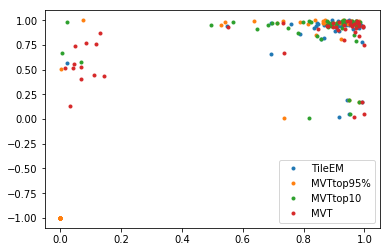

In [98]:
plt.plot(df["R [TileEM]"],df["P [TileEM]"],'.',label="TileEM")
plt.plot(df["R [MVTtop95%]"],df["P [MVTtop95%]"],'.',label="MVTtop95%")
plt.plot(df["R [MVTtop10]"],df["P [MVTtop10]"],'.',label="MVTtop10")
plt.plot(df["R [MVT]"],df["P [MVT]"],'.',label="MVT")
plt.legend()

In [52]:
cd sample/5worker_rand0/

/home/jlee782/crowd-seg/analysis/TileEM/sample/5worker_rand0


In [49]:
from TileEM_plot_toolbox import *

def majority_vote(objid,heuristic="50%"):
    #Compute PR for majority voted region
    tiles = pkl.load(open("vtiles{}.pkl".format(objid)))
    indMat = pkl.load(open("indMat{}.pkl".format(objid)))
    workers = pkl.load(open("worker{}.pkl".format(objid)))
    
    area = indMat[-1]
    votes = indMat[:-1].sum(axis=0)
    if heuristic=="50%":
        tidx=np.where(votes>np.shape(indMat[:-1])[0]/2.)[0]
    elif heuristic=="topk":
        topk=10
        tidx = np.argsort(votes)[::-1][:topk]
    elif heuristic=="topPercentile":
        percentile=95
        tidx=np.where(votes>np.percentile(votes,percentile))[0]
    P,R = compute_PR(objid,tidx,tiles)
    return P,R

In [54]:
P,R = majority_vote(5,heuristic="topk")
P,R = majority_vote(5,heuristic="topPercentile")
P,R = majority_vote(5,heuristic="50%")

[ 5.  5.  4.  4.  4.  4.  4.  4.  4.  4.]
10


# Analyzing outputs 

In [324]:
sampleN_lst=[5]
batch_all_data=[]
for Nworker in sampleN_lst:
    for batch_num in range(7):#range(worker_Nbatches[Nworker]):
        dir_name = "sample/{0}worker_rand{1}".format(Nworker,batch_num)
        batch_i_data=pd.read_csv(dir_name+"/PR_tbl_all.csv",index_col=0)
       
        # First set the object_id column the index, then reindex based on this index to correspond to object lst
        # This fills in a row of NaN for the missing data objects, so it normalizes the shape of our data table 
        batch_i_data = batch_i_data.set_index('object_id').reindex(object_lst,fill_value =0)
         # Add a row of non-nan count for averaging 
        nan_rowidx= list(batch_i_data[batch_i_data["P [Num Points]"]==0].index)
        non_nan_count = np.ones_like(object_lst)
        for row in nan_rowidx: non_nan_count[row-1]=0
        batch_i_data["non_nan_count"]=non_nan_count
        if batch_num==0:
            batch_all_data=batch_i_data
        else:
            batch_all_data+=batch_i_data
batch_all_data=batch_all_data[batch_all_data.keys()[:-1]].divide(batch_all_data["non_nan_count"],axis=0)

In [325]:
batch_all_data.mean()

P [Num Points]          0.846518
R [Num Points]          0.919317
P [Area Ratio]          0.774965
R [Area Ratio]          0.946566
P [Jaccard [Self]]      0.935376
R [Jaccard [Self]]      0.945653
P [Precision [Self]]    0.952444
R [Precision [Self]]    0.872367
P [Recall [Self]]       0.836454
R [Recall [Self]]       0.972815
P [Vision10%]           0.774904
R [Vision10%]           0.843870
P [Vision50%]           0.916337
R [Vision50%]           0.744196
P [Vision90%]           0.967402
R [Vision90%]           0.533848
P [TileEM]              0.871238
R [TileEM]              0.867110
P [MVT]                 0.788412
R [MVT]                 0.710209
P [MVTtop10]            0.879039
R [MVTtop10]            0.831646
P [MVTtop95%]           0.410436
R [MVTtop95%]           0.584411
dtype: float64

In [103]:
from tabulate import tabulate

In [134]:
print [list(precision_df.mean().as_matrix()),list(recall_df.mean().as_matrix())]

[[0.70753547589361709, 0.5590247110212766, 0.95446982951063797, 0.97988143444680853, 0.72946534988747957, 0.90520449921850243], [0.84339502145744694, 0.87058918721276601, 0.95028722610638316, 0.75757326877912845, 0.98913499846808495, 0.73691887132975531]]


In [143]:
tbl = pd.DataFrame([list(precision_df.mean().as_matrix()),list(recall_df.mean().as_matrix())],columns=precision_df.keys(),index=["Precision","Recall"])

In [146]:
tbl

,Num Points,Area Ratio,Jaccard [Self],Precision [Self],Recall [Self],Vision
Precision,0.707535,0.559025,0.954470,0.979881,0.729465,0.905204
Recall,0.843395,0.870589,0.950287,0.757573,0.989135,0.736919


In [144]:
# keys = list(precision_df.keys())
# keys.insert(0,"Metric")
# p_lst = list(precision_df.mean().as_matrix())
# p_lst.insert(0,"Precision")
# r_lst = list(recall_df.mean().as_matrix())
# r_lst.insert(0,"Recall")
# tbl=[keys,p_lst,r_lst]
# print tabulate(tbl,tablefmt='latex',floatfmt='.2f')

In [123]:
# tabulate(grouped_ji_fit[idx],showindex="False",headers='keys',tablefmt='latex',floatfmt='.2f')

In [147]:
print tabulate(tbl,tablefmt='latex',headers='keys',floatfmt='.2f')

\begin{tabular}{lrrrrrr}
\hline
           &   Num Points &   Area Ratio &   Jaccard [Self] &   Precision [Self] &   Recall [Self] &   Vision \\
\hline
 Precision &         0.71 &         0.56 &             0.95 &               0.98 &            0.73 &     0.91 \\
 Recall    &         0.84 &         0.87 &             0.95 &               0.76 &            0.99 &     0.74 \\
\hline
\end{tabular}


In [216]:
tk = pkl.load(open("problematic_containment_259.pkl"))

In [217]:
T = pkl.load(open("problematic_T_containment_259.pkl"))

In [223]:
T.buffer(1e-10).contains(tk)

False